<a href="https://colab.research.google.com/github/frcaulia/dicv_odd_2023/blob/main/Week11_KTP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Faricha Aulia ✨**

---

**1. Load dataset**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**2. Import library**

In [2]:
import cv2
import os

**3. Add localization dataset**

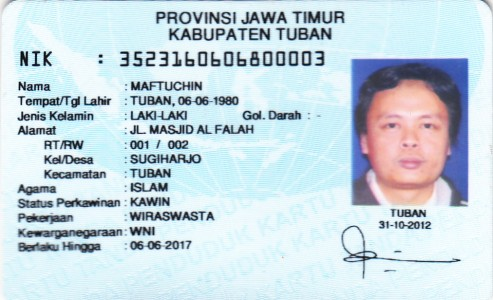

In [3]:
from google.colab.patches import cv2_imshow

# Path to the image file
img_path = '/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png'

# Load the image
img = cv2.imread(img_path)

# Check if the image is loaded successfully
if img is None:
    print("Error: Image not loaded.")
else:
    # Convert the image to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Display or save the processed image (if needed)
    cv2_imshow(img)
    cv2.destroyAllWindows()

**4. Perform Gaussian Blur**

In [4]:
# Apply Gaussian Blur to reduce noise
for i in range(10):
 blurred = cv2.GaussianBlur(gray, (5, 5), 0.5)

**5. Greyscale convert and thresholding**

165.0 (300, 493)


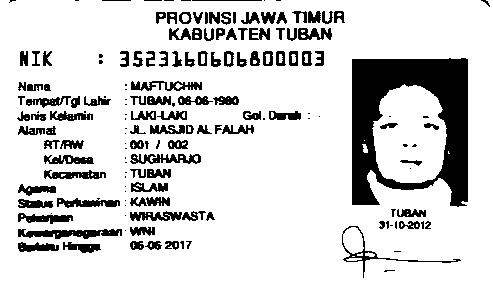

In [5]:
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret, bw.shape)

cv2_imshow(bw)

**6. Apply morfology**

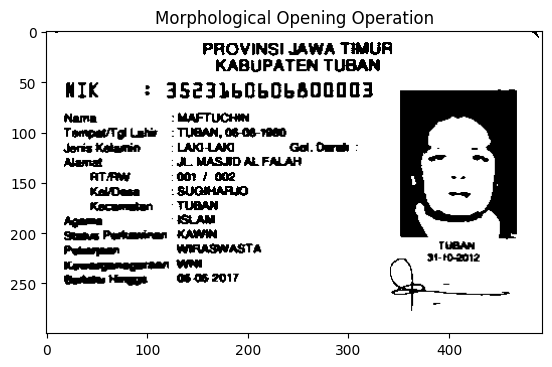

In [11]:
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt

# Invert the image
def inverse(img):
    return 1.0 - img

# Create a kernel for morphology operations
kernel = np.ones((1, 1), dtype=int)

# Define the erosion operation
def erosion(image, kernel):
    return ndimage.grey_erosion(image, footprint=kernel)

# Perform image erosion operation
eroded_image = erosion(inverse(bw), kernel)

# Display the original and the result of the opening operation
plt.imshow(inverse(eroded_image), cmap='gray')
plt.title('Morphological Opening Operation')
plt.show()


**7. Apply contour extraction to get all the contours of each character/object.
Contours should be selected based on the size and ratio of a character. The characters/objects in in this KTP vary in size and ratio, so each character/object needs to be handled differently. handled differently. The example in this exercise focuses on characters that are the same size as the with NIK. If the contour extraction results show other results, i.e. other characters are detected, it is normal because it needs better code optimization and preprocessing (because the acquisition result of each image may be different).
(because the acquisition result of each image may be different)**

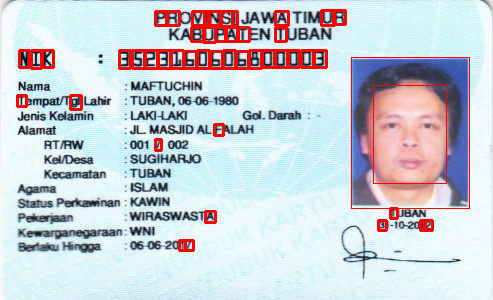

In [13]:
ktp = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')

blurred = cv2.GaussianBlur(ktp, (5, 5), 0.5)

gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)
ret, bw = cv2.threshold(gray.copy(), 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

erode = cv2.erode(bw.copy(), cv2.getStructuringElement(cv2.MORPH_OPEN, (1, 1)))

# Extraction
contours, hierarchy = cv2.findContours(erode.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Looping contours
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 20 and w >= 5 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)
    elif h >= 10 and w >= 5 and float(ras) <= 1:
      cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=2)

cv2_imshow(ktp)

**Setiap citra memiliki karakteristik yang berbeda. Terapkan praktik pada materi pengayaan KTP untuk setiap dataset KTP yang tersedia. Perhatikan kondisi awal dataset, terapkan preprocessing yang sesuai jika kualitas visual citra kurang memadai untuk segera diolah**

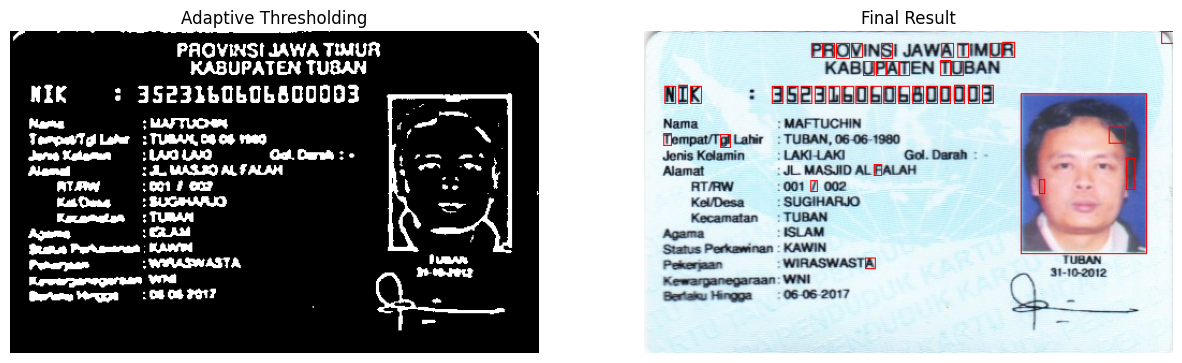

In [14]:
import matplotlib.pyplot as plt

# Read the image
ktp = cv2.imread('/content/drive/MyDrive/Images/KTP_More/KTP_More/ktp3.png')

# Apply Gaussian Blur
blurred = cv2.GaussianBlur(ktp, (7, 7), 0)

# Convert to grayscale
gray = cv2.cvtColor(blurred, cv2.COLOR_BGR2GRAY)

# Binarize the image using Adaptive Thresholding
bw = cv2.adaptiveThreshold(gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 5)

# Extract contours
contours, hierarchy = cv2.findContours(bw.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Display the binary image after thresholding
plt.figure(figsize=(15, 5))
plt.subplot(121), plt.imshow(bw, cmap='gray')
plt.title('Adaptive Thresholding'), plt.axis('off')

# Loop through contours to filter and draw bounding rectangles
for cnt in contours:
    x, y, w, h = cv2.boundingRect(cnt)
    aspect_ratio = format(w / h, '.2f')
    if h >= 10 and w >= 5 and float(aspect_ratio) <= 1:
        cv2.rectangle(ktp, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Display the final result with bounding rectangles
plt.subplot(122), plt.imshow(cv2.cvtColor(ktp, cv2.COLOR_BGR2RGB))
plt.title('Final Result'), plt.axis('off')
plt.show()